In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('mode.chained_assignment', None)

## Read GPS trace data

In [6]:
data = pd.read_csv('PRJ-3226/Highway_Vehicle_Routing_Data_R1.csv')

In [7]:
### get the rows with ID = to User1
data[data['ID'] == 'User5']

,ID,Entrance_LAT,Entrance_LON,Entrance_TIMESTAMP,Exit_LAT,Exit_LON,Exit_TIMESTAMP,Entrance_HWY,Exit_HWY
49,User5,38.391573,-122.716062,1571327100000,38.348057,-122.712628,1571328360000,Hwy 101,Hwy 101
50,User5,38.348057,-122.712628,1571348700000,38.506586,-122.769620,1571353740000,Hwy 101,Hwy 101
51,User5,38.348057,-122.712628,1571361960000,38.670608,-122.879569,1571374740000,Hwy 101,Hwy 101
52,User5,38.381359,-122.716319,1571375760000,38.348014,-122.712628,1571376720000,Hwy 101,Hwy 101
53,User5,38.389642,-122.716062,1571440680000,38.706314,-122.904374,1571443020000,Hwy 101,Hwy 128
54,User5,38.706614,-122.904417,1571465820000,38.437278,-122.718164,1571467320000,Hwy 128,Hwy 101
55,User5,38.454058,-122.726147,1571850180000,38.348014,-122.712628,1571850960000,Hwy 101,Hwy 101
56,User5,38.562762,-122.824037,1571873880000,38.451869,-122.726233,1571875380000,Hwy 101,Hwy 101
57,User5,38.363420,-122.713229,1571876280000,38.347885,-122.712886,1571877000000,Hwy 101,Hwy 101


In [ ]:
### Create a new column with the travel time in seconds subtracting Exit_TIMESTAMP - Entrance_TIMESTAMP
data['Travel_Time'] = pd.to_datetime(data['Exit_TIMESTAMP']) - pd.to_datetime(data['Entrance_TIMESTAMP'])

### travle time is in milliseconds, so we need to convert it to seconds
data['Travel_Time'] = data['Travel_Time'].dt.total_seconds()




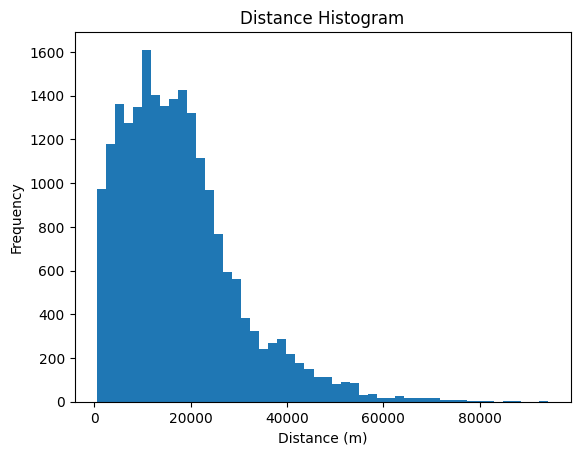

In [19]:
### add a column for distance that calculates the distance between to Lat Long points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)

    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c  # output distance in meters
    return meters

data['Distance'] = data.apply(lambda x: haversine(x['Entrance_LAT'], x['Entrance_LON'], x['Exit_LAT'], x['Exit_LON']), axis=1)

### plot data['Distance'] histogram
plt.hist(data['Distance'], bins=50)
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()


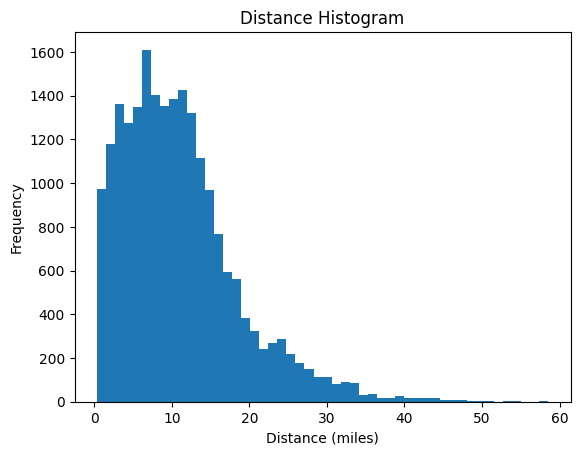

In [20]:
### convert distance into miles
data['Distance'] = data['Distance'] * 0.000621371

### plot data['Distance'] histogram
plt.hist(data['Distance'], bins=50)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distance Histogram')
plt.show()


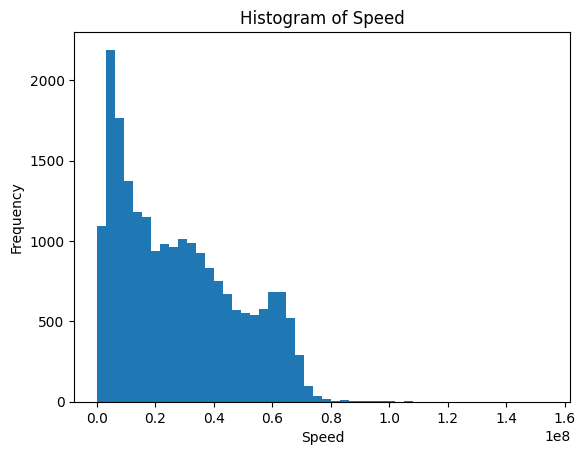

In [25]:
### Distance is in miles and travel time is in miliseconds, so we need to convert travel time to hours
data['Travel_Time'] = data['Travel_Time'] / 3600

### create a new column speed and calculate miles per hour
data['Speed'] = data['Distance'] / data['Travel_Time']


### plot data['Speed'] as a histogram
plt.hist(data['Speed'], bins=50)
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Speed')
plt.show()

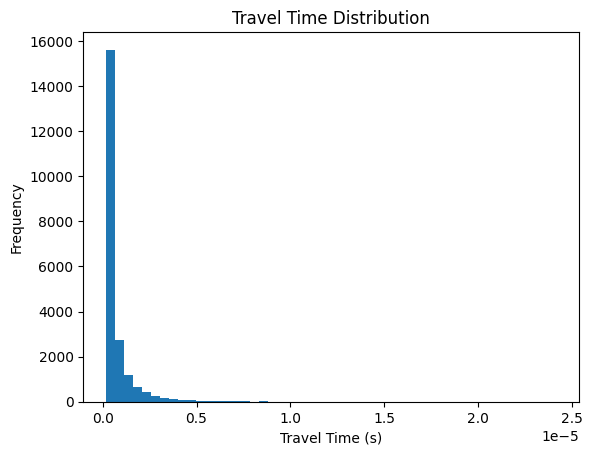

In [26]:
### Plot histogram of travel times
plt.hist(data['Travel_Time'], bins=50)
plt.xlabel('Travel Time (s)')   
plt.ylabel('Frequency')
plt.title('Travel Time Distribution')
plt.show()


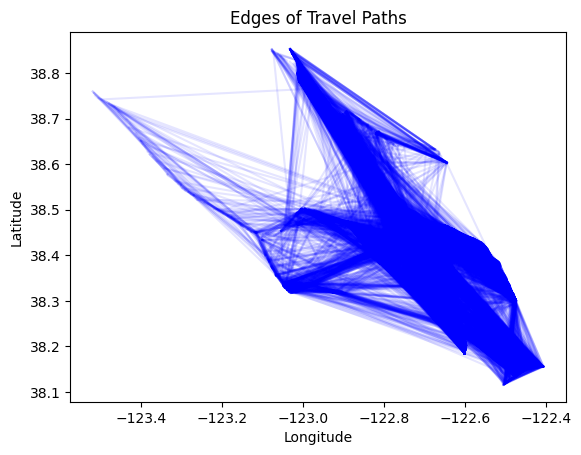

In [36]:
### Plot the Entrance_LAT, Entrance_LON, Exit_LAT, Exit_LON as edges for each row of data
fig, ax = plt.subplots()
for index, row in data.iterrows():
    ax.plot([row['Entrance_LON'], row['Exit_LON']], [row['Entrance_LAT'], row['Exit_LAT']], 'b-', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Edges of Travel Paths')
#cx.add_basemap(ax, crs=data.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.show()




# Problematic Users
- User4

In [27]:
### create a new dataframe with only the rows with ID = to User1
data_user1 = data[data['ID'] == 'User6']

### extract the lat and lon value
Entrance_Lat = data_user1['Entrance_LAT'].values
Entrance_Lon = data_user1['Entrance_LON'].values
Entrance_Time = data_user1['Entrance_TIMESTAMP'].values
Exit_Lat = data_user1['Exit_LAT'].values
Exit_Lon = data_user1['Exit_LON'].values
Exit_Time = data_user1['Exit_TIMESTAMP'].values

print(Entrance_Time)
print(Exit_Time)

[1571211000000 1571271660000 1571297220000 1571358780000 1571435640000
 1571453100000 1571600340000 1571625240000 1571704260000 1571876580000
 1572635280000 1572990780000 1573269840000 1573328820000 1573329480000]
[1571211840000 1571272560000 1571297940000 1571359500000 1571436300000
 1571454120000 1571601000000 1571626200000 1571704920000 1571878020000
 1572636060000 1572991620000 1573270560000 1573329420000 1573330500000]


In [28]:
### convert
Entrance_Time[0]

1571211000000

In [29]:
lats = []
lons = []
times = []
for i in range(len(Entrance_Time)):
    lats.append(Entrance_Lat[i])
    lats.append(Exit_Lat[i])
    lons.append(Entrance_Lon[i])
    lons.append(Exit_Lon[i])
    times.append(Entrance_Time[i])
    times.append(Exit_Time[i])


In [30]:
### Create a dataframe with the extracted values
df = pd.DataFrame({'GRAVYREGISTRATIONID': 'User2', 'GEOHASHLATITUDE': lats, 'GEOHASHLONGITUDE': lons, 'TIMESTAMP_EPOCH_MILLISECOND': times})
df

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,TIMESTAMP_EPOCH_MILLISECOND
0,User2,38.195106,-122.599890,1571211000000
1,User2,38.356940,-122.712929,1571211840000
2,User2,38.453886,-122.725846,1571271660000
3,User2,38.369042,-122.712929,1571272560000
4,User2,38.190429,-122.601220,1571297220000
5,User2,38.359000,-122.712929,1571297940000
6,User2,38.445003,-122.723829,1571358780000
7,User2,38.352048,-122.713358,1571359500000
8,User2,38.353893,-122.713229,1571435640000
9,User2,38.246777,-122.627742,1571436300000


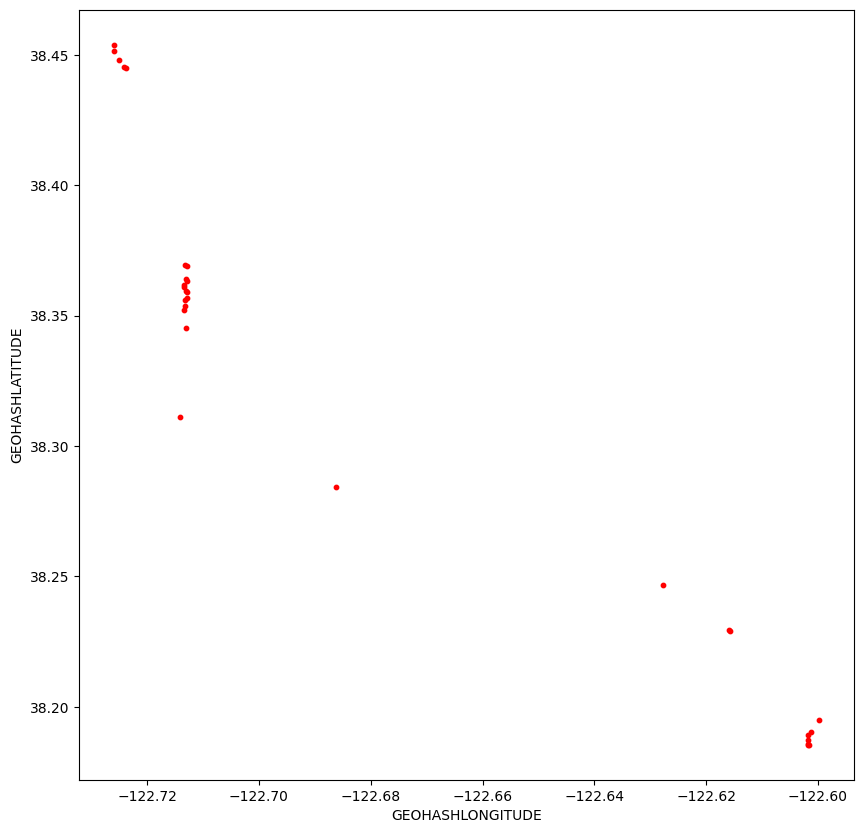

In [31]:
### Plot as points the lat lon values
fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, kind='scatter', x='GEOHASHLONGITUDE', y='GEOHASHLATITUDE', color='red', s=10)
plt.show()


## Read highway data

In [32]:
hwy = gpd.read_file('zip://PRJ-3226/Highways.zip')

## Add buffer to highway

In [33]:
buffer=hwy.to_crs(epsg=3857).buffer(50)
buffer.index=hwy['Name']

## Spatial Join

In [34]:
df.sort_values(by='TIMESTAMP_EPOCH_MILLISECOND',inplace=True)
geo_data = gpd.GeoDataFrame(df.copy(), geometry=gpd.points_from_xy(df.GEOHASHLONGITUDE, df.GEOHASHLATITUDE),
                                   crs={'init': 'epsg:4326','no_defs': True})

C:\Users\pfoytik\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [35]:
area = buffer.to_crs(epsg=4326)
area = gpd.GeoDataFrame(geometry=area)
joint = gpd.sjoin(left_df=geo_data, right_df=area,how="inner")#, op='within')
joint.drop_duplicates(subset=['GRAVYREGISTRATIONID', 'TIMESTAMP_EPOCH_MILLISECOND'], keep='first',inplace=True)

C:\Users\pfoytik\AppData\Local\Temp\ipykernel_30508\2464875485.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +no_defs +type=crs
Right CRS: EPSG:4326

  joint = gpd.sjoin(left_df=geo_data, right_df=area,how="inner")#, op='within')


In [36]:
joint

,GRAVYREGISTRATIONID,GEOHASHLATITUDE,GEOHASHLONGITUDE,TIMESTAMP_EPOCH_MILLISECOND,geometry,Name
0,User2,38.195106,-122.599890,1571211000000,POINT (-122.59989 38.19511),Hwy 101
1,User2,38.356940,-122.712929,1571211840000,POINT (-122.71293 38.35694),Hwy 101
2,User2,38.453886,-122.725846,1571271660000,POINT (-122.72585 38.45389),Hwy 101
3,User2,38.369042,-122.712929,1571272560000,POINT (-122.71293 38.36904),Hwy 101
4,User2,38.190429,-122.601220,1571297220000,POINT (-122.60122 38.19043),Hwy 101
5,User2,38.359000,-122.712929,1571297940000,POINT (-122.71293 38.359),Hwy 101
6,User2,38.445003,-122.723829,1571358780000,POINT (-122.72383 38.445),Hwy 101
7,User2,38.352048,-122.713358,1571359500000,POINT (-122.71336 38.35205),Hwy 101
8,User2,38.353893,-122.713229,1571435640000,POINT (-122.71323 38.35389),Hwy 101
9,User2,38.246777,-122.627742,1571436300000,POINT (-122.62774 38.24678),Hwy 101


In [37]:
### Measure the distance between each lat lon points and print the highest distance pair
from geopy.distance import geodesic
max_distance = 0
max_distance_pair = []
for i in range(len(joint)-1):
    distance = geodesic((joint.iloc[i].GEOHASHLATITUDE, joint.iloc[i].GEOHASHLONGITUDE), (joint.iloc[i+1].GEOHASHLATITUDE, joint.iloc[i+1].GEOHASHLONGITUDE)).meters
    if distance > max_distance:
        max_distance = distance
        max_distance_pair = [joint.iloc[i].GEOHASHLATITUDE, joint.iloc[i].GEOHASHLONGITUDE, joint.iloc[i+1].GEOHASHLATITUDE, joint.iloc[i+1].GEOHASHLONGITUDE]
print(max_distance)
print(max_distance_pair)


31465.64404279481
[38.185493, -122.601692, 38.451526, -122.725932]


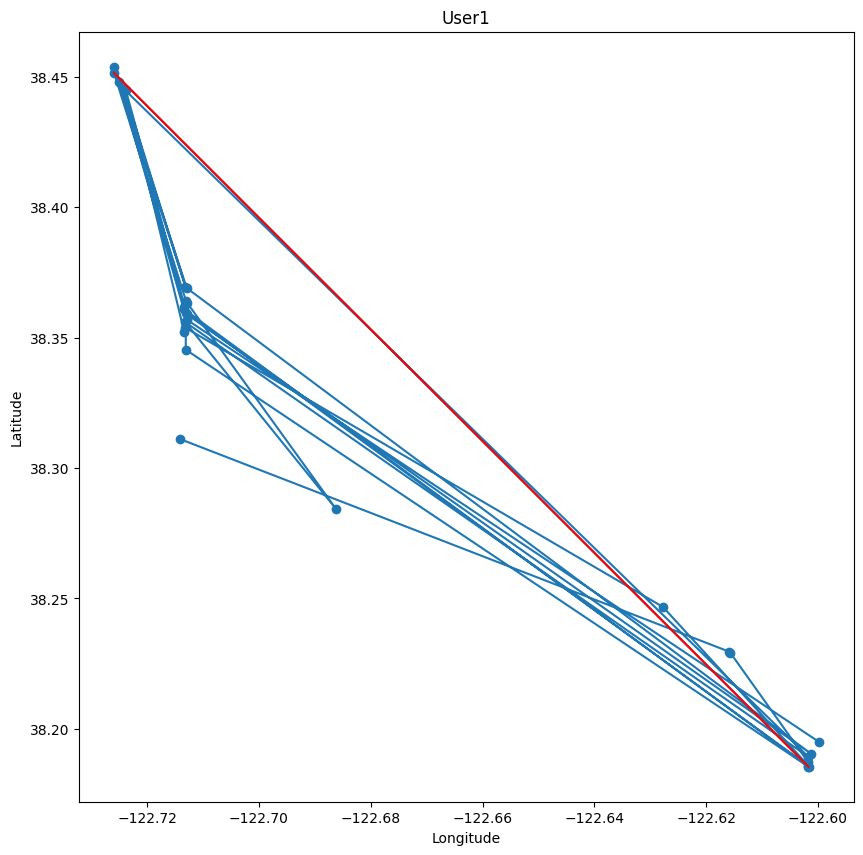

In [38]:
### Plot the max distance pair
plt.figure(figsize=(10, 10))
plt.plot(lons, lats, marker='o')
plt.plot([max_distance_pair[1], max_distance_pair[3]], [max_distance_pair[0], max_distance_pair[2]], color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User1')
plt.show()

## Extract proxy entrance and exit

In [39]:
entrance = joint.iloc[0,:]
exit = joint.iloc[-1,:]
entrance_index = joint.index[0]
exit_index = joint.index[-1]

In [40]:
### identify index of joint that has GEOHASHLATITUDE = to max_distance_pair[0] and GEOHASHLONGITUDE = to max_distance_pair[1]
for i in range(len(joint)):
    if joint.iloc[i].GEOHASHLATITUDE == max_distance_pair[0] and joint.iloc[i].GEOHASHLONGITUDE == max_distance_pair[1]:
        entrance = joint.iloc[i]
        entrance_index = joint.index[i]
        break

### identify index of joint that has GEOHASHLATITUDE = to max_distance_pair[2] and GEOHASHLONGITUDE = to max_distance_pair[3]
for i in range(len(joint)):
    if joint.iloc[i].GEOHASHLATITUDE == max_distance_pair[2] and joint.iloc[i].GEOHASHLONGITUDE == max_distance_pair[3]:
        exit = joint.iloc[i]
        exit_index = joint.index[i]
        break



## Visualization

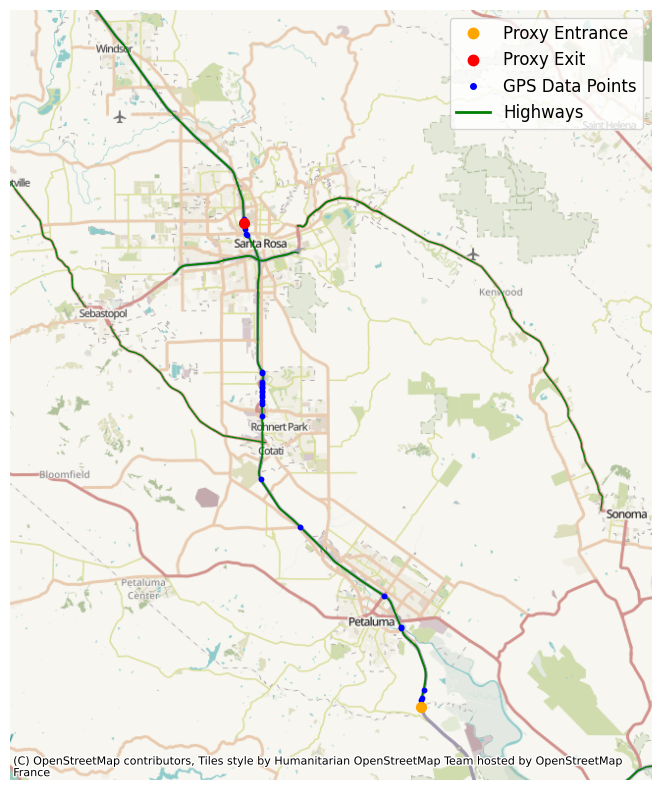

In [41]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10),dpi=100)
hwy.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='g', linewidth = 1, zorder=1, alpha=1)
geo_data.to_crs(epsg=3857).plot(ax=ax,color='b',markersize=10, zorder=2)
geo_data.to_crs(epsg=3857).loc[[entrance_index]].plot(ax=ax,color='orange',markersize=50, zorder=3)
geo_data.to_crs(epsg=3857).loc[[exit_index]].plot(ax=ax,color='r',markersize=50, zorder=3)


legend_elements = [Line2D([0], [0], marker='.', color='orange', lw=0, markersize=15, label='Proxy Entrance'),
                   Line2D([0], [0], marker='.', color='r', lw=0, markersize=15, label='Proxy Exit'),
                   Line2D([0], [0], marker='.', color='b', lw=0, markersize=8, label='GPS Data Points'),
                   Line2D([0], [0], marker='.', color='g', lw=2, markersize=0, markerfacecolor='k', label='Highways'),
                  ]
ax.legend(handles=legend_elements,fontsize=12)

ax.set_ylim(4600000, 4660000)
ax.set_xlim(-13680000, -13630000)
ax.axis('off')

cx.add_basemap(ax)